In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
ds_train = keras.utils.image_dataset_from_directory(
    "C:\\Private\\BiomeVision\\dataset-03--09-04-2022---1-out-grouped-lite",
    image_size=(256,128),
    seed=123,
    validation_split=0.2,
    subset="training"
)
ds_validation = keras.utils.image_dataset_from_directory(
    "C:\\Private\\BiomeVision\\dataset-03--09-04-2022---1-out-grouped-lite",
    image_size=(256,128),
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 43434 files belonging to 6 classes.
Using 34748 files for training.
Found 43434 files belonging to 6 classes.
Using 8686 files for validation.


In [3]:
ds_train.class_names

['desert', 'forest', 'jungle', 'plains', 'river', 'taiga']

In [4]:
model = models.Sequential()
model.add(layers.MaxPooling2D((2,2))) # added
model.add(layers.Conv2D(6, (5,5), activation="relu")) # 5,5   # removed temporarily
model.add(layers.MaxPooling2D((2,2)))   # removed temporarily
model.add(layers.Conv2D(16, (5,5), activation="relu")) # 5,20   # removed temporarily
model.add(layers.MaxPooling2D((2,2)))   # removed temporarily
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation="softmax"))

In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(
        ds_train,
        epochs=10,
        validation_data=ds_validation,
        verbose=1
    )

In [9]:
for i in range(4):
    model.fit(
        ds_train,
        epochs=10,
        validation_data=ds_validation,
        verbose=1
    )
    model.save("C:\Private\BiomeVision\model1-2022-07-06-lite-cache" + str(i+1))

Epoch 1/10
1086/1086 [==============================] - 54s 49ms/step - loss: 0.2934 - accuracy: 0.8999 - val_loss: 0.5516 - val_accuracy: 0.8618
Epoch 2/10
1086/1086 [==============================] - 53s 49ms/step - loss: 0.2904 - accuracy: 0.9017 - val_loss: 0.6044 - val_accuracy: 0.8458
Epoch 3/10
1086/1086 [==============================] - 53s 49ms/step - loss: 0.2727 - accuracy: 0.9082 - val_loss: 0.6074 - val_accuracy: 0.8456
Epoch 4/10
1086/1086 [==============================] - 53s 49ms/step - loss: 0.2710 - accuracy: 0.9095 - val_loss: 0.5954 - val_accuracy: 0.8521
Epoch 5/10
1086/1086 [==============================] - 53s 49ms/step - loss: 0.2457 - accuracy: 0.9165 - val_loss: 0.6194 - val_accuracy: 0.8526
Epoch 6/10
1086/1086 [==============================] - 53s 49ms/step - loss: 0.2422 - accuracy: 0.9181 - val_loss: 0.6745 - val_accuracy: 0.8401
Epoch 7/10
1086/1086 [==============================] - 55s 50ms/step - loss: 0.2451 - accuracy: 0.9174 - val_loss: 0.6575 -

In [33]:
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_validation,
    verbose=1
)

Epoch 1/10


C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


  74/1478 [>.............................] - ETA: 1:07 - loss: 6.2027 - accuracy: 0.1242

KeyboardInterrupt: 

In [20]:
model.save("C:\Private\BiomeVision\model1-2022-06-20-3-4pre")

INFO:tensorflow:Assets written to: C:\Private\BiomeVision\model1-2022-06-20-3-4pre\assets


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_5 (MaxPooling  (None, 128, 64, 3)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 60, 6)        456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 30, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 26, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 13, 16)       0         
 2D)                                                             
                                                      

In [59]:
history = model.fit(
    ds_train,
    epochs=30,
    validation_data=ds_validation,
    verbose=1
)

Epoch 1/30
2558/2558 [==============================] - 381s 149ms/step - loss: 3.3788 - accuracy: 0.2204 - val_loss: 2.2664 - val_accuracy: 0.3408
Epoch 2/30
2558/2558 [==============================] - 371s 145ms/step - loss: 2.2881 - accuracy: 0.3412 - val_loss: 2.4949 - val_accuracy: 0.3036
Epoch 3/30
2558/2558 [==============================] - 371s 145ms/step - loss: 1.9383 - accuracy: 0.4141 - val_loss: 1.9335 - val_accuracy: 0.4124
Epoch 4/30
2558/2558 [==============================] - 368s 144ms/step - loss: 1.6605 - accuracy: 0.4794 - val_loss: 1.5390 - val_accuracy: 0.5222
Epoch 5/30
2558/2558 [==============================] - 374s 146ms/step - loss: 1.5451 - accuracy: 0.5077 - val_loss: 1.6251 - val_accuracy: 0.4984
Epoch 6/30
2558/2558 [==============================] - 371s 145ms/step - loss: 1.4497 - accuracy: 0.5334 - val_loss: 1.4795 - val_accuracy: 0.5366
Epoch 7/30
2558/2558 [==============================] - 374s 146ms/step - loss: 1.4154 - accuracy: 0.5460 - val_

In [27]:
predictions = model.predict(ds_validation)
print(predictions)

[[1.34588988e-03 9.98654127e-01 3.94085487e-17 ... 1.27000214e-20
  2.13002097e-19 5.31516638e-19]
 [1.00000000e+00 5.19166963e-25 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.94551110e-19 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99995112e-01 4.93750258e-06 1.04807518e-35 ... 0.00000000e+00
  0.00000000e+00 1.82774036e-36]]


In [29]:
model.evaluate(ds_validation, verbose=0)

[0.07773324847221375, 0.982538640499115]

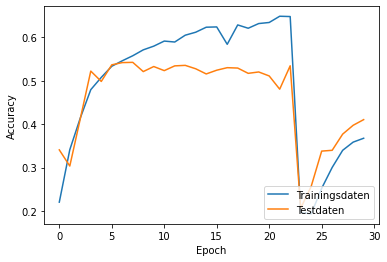

In [60]:
plt.plot(history.history['accuracy'], label='Trainingsdaten')
plt.plot(history.history['val_accuracy'], label = 'Testdaten')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.legend(loc='lower right')
plt.show()